{% include toc title="This Week" icon="file-text" %}

<div class="notice--info" markdown="1">

## <i class="fa fa-ship" aria-hidden="true"></i> Welcome to Week {{ page.week }}!

Welcome to week {{ page.week }} of Earth Analytics! In week {{ page.week }} you will learn about
Light Detection and Ranging (LiDAR) data. You will learn to use point cloud data and
lidar rasters in `Python` and explore using QGIS - a free, open-source GIS tool.

<!-- 
Your final 2013 Colorado flood report assignment is below. Read the assignment
carefully and make sure you've completed all of the steps and followed all of the
guidelines. Use all of the class and homework lessons that you've learned in the
first few weeks to help you complete the assignment.
-->

{% include/data_subsets/course_earth_analytics/_data-colorado-flood.md %}

</div>

## <i class="fa fa-calendar-check-o" aria-hidden="true"></i> Class Schedule

| time          | topic                                                     | speaker           |  |  |
|:--------------|:----------------------------------------------------------|:------------------|:-|:-|
| First 15 minutes       | Review Jupyter Notebook / questions                  | Leah              |  |  |
| Rest of Class | Python coding session - Working with Raster Data in Python | Leah              |  |  |

### 1. Readings

First - review ALL of the lessons for this week. We did not cover them all in class. This
includes the in class and homework lessons.

Read the following articles. They will help you write your report.

* Wehr, A., and U. Lohr (1999). Airborne Laser Scanning - An Introduction and Overview. ISPRS Journal of Photogrammetry and Remote Sensing 54:68–92. doi: 10.1016/S0924-2716(99)00011-8 : <a href="http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.9.516&rep=rep1&type=pdf" target="_blank" data-proofer-ignore=''><i class="fa fa-download" aria-hidden="true"></i>
PDF</a>
* <a href="https://www.e-education.psu.edu/natureofgeoinfo/node/1888" target="_blank">Intro to Lidar</a>
* <a href="https://www.e-education.psu.edu/natureofgeoinfo/node/1890" target="_blank">Active remote sensing</a>


<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Homework

Please see the assignment dropbox on CANVAS for an overview of your homework for this week. If you'd like to see what your plots should look like - please scroll down to the bottom of this page. 

Note that your plots may look at bit different from the ones on this page as you might select different classification value ranges and colors. That is OK. Please be sure to justify your choices in your homework test. 


</div>

## Homework Plots

The plots below are examples of what your plots might look like. Your plots do not need to look exactly like these! You may use different classes for your different maps for example which will change your rasters! Feel free to customize colors, labels, layers, etc as you like to create nice plots.

In [1]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import earthpy as et
import earthpy.plot as ep
import geopandas as gpd
import os.path as op
import rasterio as rio
from rasterio.mask import mask
from shapely.geometry import mapping
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch

# prettier plotting with seaborn
import seaborn as sns
sns.set(font_scale=1.5, style="white")

#if using method 2 for plot 1
# import cartopy as cp
# import cartopy.crs as ccrs
# from cartopy.io import shapereader as shp
# from download import download

## Grade Rubric

Please view the dropbox in Canvas to see the rubric that will be used to grade your assignment

## Homework Plots
The plots that you generate for this week's homework should look like the ones below. 
Note that your plot may have some variation if you select different classification bins and plot colors. 



In [2]:
# set home directory and download data
data = et.data.get_data('colorado-flood')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [3]:
# crop data
crop_extent = gpd.read_file(
    'data/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp')
geo = mapping(crop_extent['geometry'][0])


# open and crop pre and post flood DTM
with rio.open("data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif") as pre_dtm:
    pre_dtm_crop, _ = mask(pre_dtm, [geo], crop=True)

with rio.open("data/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif") as post_dtm:
    post_dtm_crop, _ = mask(post_dtm, [geo], crop=True)

with rio.open("data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif") as pre_dsm:
    pre_dsm_crop, _ = mask(pre_dsm, [geo], crop=True)

with rio.open("data/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DSM.tif") as post_dsm:
    post_dsm_crop, _ = mask(post_dsm, [geo], crop=True)

bounds = pre_dtm.bounds
bounds = [bounds.left, bounds.right, bounds.bottom, bounds.top]

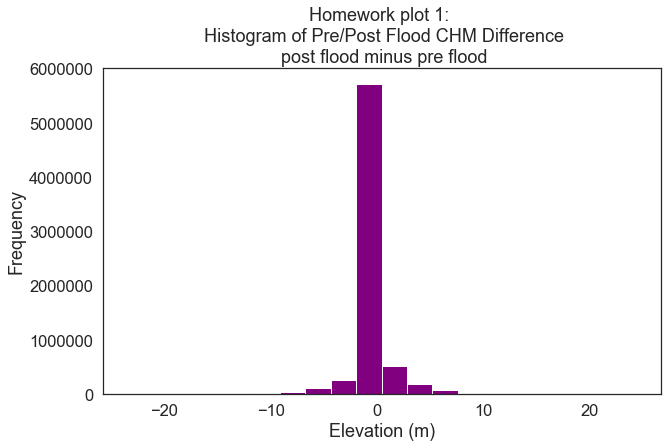

In [4]:
# Calculate CHM and CHM Difference
pre_chm_crop = pre_dsm_crop - pre_dtm_crop
post_chm_crop = post_dsm_crop - post_dtm_crop
diff_chm_crop = post_chm_crop - pre_chm_crop

# create histogram
ep.hist(diff_chm_crop,
        title='Homework plot 1: \n Histogram of Pre/Post Flood CHM Difference\n post flood minus pre flood',
        xlabel='Elevation (m)', 
        ylabel='Frequency',
        bins=20, figsize=(10, 6))

plt.show()

In [5]:
# PLOT 2: Classified pre/post CHM difference raster

# classify raster map
colors = ['indigo', 'white', 'forestgreen']
class_bins = [-np.inf, -1, 1, np.inf]
diff_chm_class = np.digitize(diff_chm_crop, class_bins)
# np.unique(diff_chm_class)

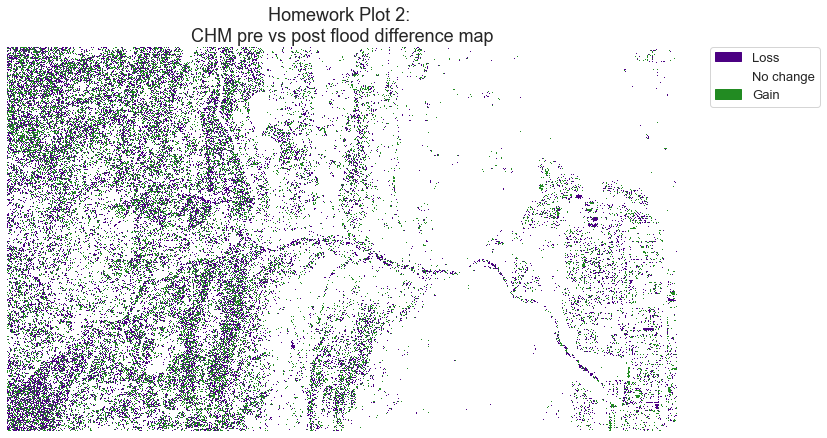

In [6]:
# plot data
cmap = ListedColormap(colors)

# create cropped raster map
fig, ax = plt.subplots(figsize=(12, 12))
diff_change = ax.imshow(diff_chm_class[0], cmap=cmap)
ax.set_axis_off()

# add legend
xlabels = ['Loss', 'No change', 'Gain']
ep.draw_legend(diff_change, titles=xlabels)

# set title
ax.set_title('Homework Plot 2: \nCHM pre vs post flood difference map')
plt.show()

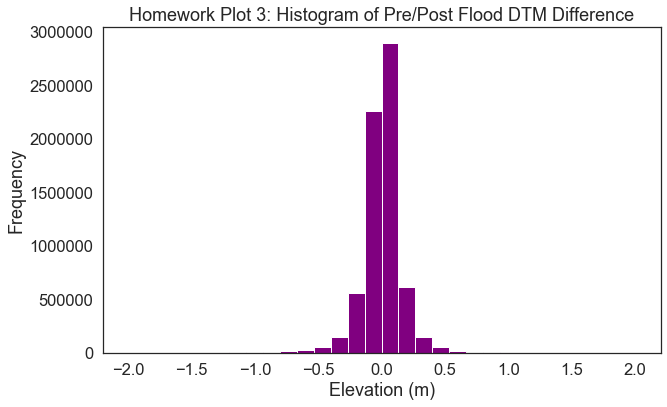

In [17]:
# PLOT 3: pre/post DTM difference raster histogram
diff_dtm_im = post_dtm_crop - pre_dtm_crop

# find the difference between the two
diff_dtm_crop = post_dtm_crop - pre_dtm_crop

# create histogram
ep.hist(diff_dtm_crop,
        title='Homework Plot 3: Histogram of Pre/Post Flood DTM Difference',
        xlabel='Elevation (m)', 
        ylabel='Frequency',
        bins=30, figsize=(10, 6), hist_range=(-2,2))

plt.show()

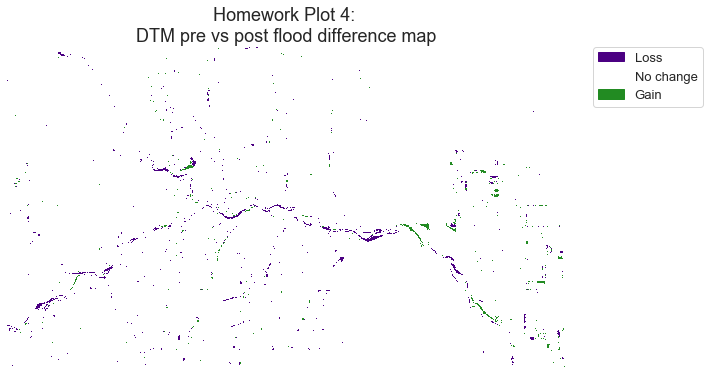

In [8]:
# PLOT 4: Classified pre/post DTM difference raster

# classify raster map
colors = ['indigo', 'white', 'forestgreen']
class_bins = [-np.inf, -1, 1, np.inf]
diff_dtm_crop_class = np.digitize(diff_dtm_crop, class_bins)
cmap = ListedColormap(colors)

# create cropped raster map
fig, ax = plt.subplots(figsize=(10, 9))
diff_dtm_crop_class_plot = ax.imshow(diff_dtm_crop_class[0], cmap=cmap)
ax.set_axis_off()

# add legend
xlabels = ['Loss', 'No change', 'Gain']
ep.draw_legend(diff_dtm_crop_class_plot, titles = xlabels)


# set title
ax.set_title('Homework Plot 4: \nDTM pre vs post flood difference map')
plt.show()

In [9]:
# #PLOT 1: A basemap showing the location of the stream gage / study area created using folium

# m = folium.Map(location=[40.0150, -105.2705],
#               tiles = 'Stamen Terrain')
# folium.Marker(
#     location=[40.051667, -105.178333],
#     popup='Stream Gage',
#     icon=folium.Icon()
# ).add_to(m)

# m

In [10]:

# # PLOT 2: a plot of precipitation from 2003 to 2013 using matplotlib.
# # read data into a pandas dataframe
# f = "data/colorado-flood/precipitation/805325-precip-dailysum-2003-2013.csv"
# bdp = pd.read_csv(f, parse_dates=['DATE'], na_values=[999.99])

# # form plot with title and axis labels
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.plot('DATE', 'DAILY_PRECIP', '.', data=bdp, c='purple')

# # add titles and display properties
# ax.set(xlabel='Date', ylabel='Daily Precipitation (inches)',
#        title='Homework plot 2: Precipitation-Boulder, CO\n 2013-2014')
# ax.set_facecolor('w')
# ax.spines['left'].set_color('k')
# ax.spines['bottom'].set_color('k')
# ax.spines['top'].set_color('k')
# ax.spines['right'].set_color('k')
# ax.grid(c='lightgrey');

In [11]:
# # PLOT 3: a plot that shows precipitation SUBSETTED from Aug 15 - Oct 15 2013 using matplotlib.
# # make a dataframe of subsetted data
# bdp_subset = bdp.query('DATE >= "2013-08-15" and DATE <= "2013-10-15"')

# # Create subplot and graph daily_precip subset as a bar graph
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.bar(bdp_subset['DATE'].values, bdp_subset['DAILY_PRECIP'].values, 
#        color='purple')

# # format x-axis ticks
# ax.xaxis.set_major_locator(mdates.WeekdayLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# ax.xaxis.set_minor_locator(mdates.DayLocator())

# # add titles and display properties
# ax.set(xlabel='Date', ylabel='Daily Precipitaion (inches)',
#        title='Homework plot 3: Precipitation - Boulder, CO\nSubset: Aug 15 2013 - October 15 2013',
#        xlim=['2013-08-15', '2013-10-15'])
# ax.set_facecolor('w')
# ax.spines['left'].set_color('k')
# ax.spines['bottom'].set_color('k')
# ax.spines['top'].set_color('k')
# ax.spines['right'].set_color('k')
# ax.grid(c='lightgrey');

In [12]:
# # PLOT 4: a plot of stream discharge from 1986 to 2016 using matplotlib.
# # import file
# f = "data/colorado-flood/discharge/06730200-discharge-daily-1986-2013.csv"
# discharge = pd.read_csv(f, parse_dates=['datetime'])

# # create subplot and graph daily_precip as a bar graph
# fig, ax = plt.subplots(figsize=(14, 14))
# ax.plot(discharge['datetime'], discharge['disValue'], color='purple')

# # add titles and display properties
# ax.set_title("Homework plot 4: Discharge - Boulder, CO\n1986-2013")
# ax.set_xlabel("Date")
# ax.set_ylabel("Stream Discharge (CFS)")
# ax.set_facecolor('w')
# ax.spines['left'].set_color('k')
# ax.spines['bottom'].set_color('k')
# ax.spines['top'].set_color('k')
# ax.spines['right'].set_color('k')
# ax.grid(c='lightgrey');

In [13]:

# # PLOT 5: a plot that shows stream discharge SUBSETTED from Aug 15 - Oct 15 2013 using matplotlib.
# # make a dataframe of just the subsetted data
# discharge_subset = discharge[(discharge['datetime'] >= "2013-08-15") &
#                              (discharge['datetime'] <= "2013-10-15")]

# # Create subplot and graph daily_precip as a bar graph
# fig, ax = plt.subplots(figsize=(14, 14))
# ax.plot(discharge_subset['datetime'],
#         discharge_subset['disValue'], color = 'purple')

# # set ticks every week
# ax.xaxis.set_major_locator(mdates.WeekdayLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# ax.xaxis.set_minor_locator(mdates.DayLocator())

# # add titles and display properties
# ax.set(xlabel='Date', ylabel='Stream Discharge (CFS)',
#        title='Homework plot 5: Discharge - Boulder, CO\nAug-Oct 2013')
# ax.set_facecolor('w')
# ax.spines['left'].set_color('k')
# ax.spines['bottom'].set_color('k')
# ax.spines['top'].set_color('k')
# ax.spines['right'].set_color('k')
# ax.grid(c='lightgrey');